In [1]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

2023-01-28 22:56:27.410782: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/lib/R/lib::/.singularity.d/libs
2023-01-28 22:56:27.410848: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
cell_counts = pd.read_csv('IBD_cibsrt_ldr.csv')
print(cell_counts)

data_all = dat.from_pandas(cell_counts, covariate_columns=["samples", "lDR"])
print(data_all)


     samples   lDR    INF.macs   RES.macs        DC1        DC2  Activated.DC  \
0   KB.176.1   L_R   305.34615  138.66603    0.00000  387.58491      94.82555   
1   KB.108.1   L_R   617.31427  169.23615    0.00000  427.43159      66.18386   
2   KB.125.1   L_R   864.83837  253.39282    0.00000  325.23347      33.83564   
3   KB.033.1   L_R   176.99551  121.93750    0.00000  192.70334      86.23057   
4   KB.034.1   L_R   587.47350  127.28370    0.00000  140.79920      43.73285   
5   KB.114.2   L_R   438.33309  243.60014    0.00000  308.98245      69.01798   
6   KB.148.1   L_R   726.48920  235.59446    0.00000  331.99628      71.02725   
7   KB.172.1   L_R   656.94662  189.52396    0.00000  529.38682       0.00000   
8   KB.051.1  L_NR     0.00000    0.00000    0.00000  132.41282       0.00000   
9   KB.177.1   L_R  1026.59068  271.90091  128.16657  341.38399      57.23336   
10  KB.134.1   L_R   925.23485  101.49115    0.00000  317.22598      71.75465   
11  KB.151.1  L_NR     0.000

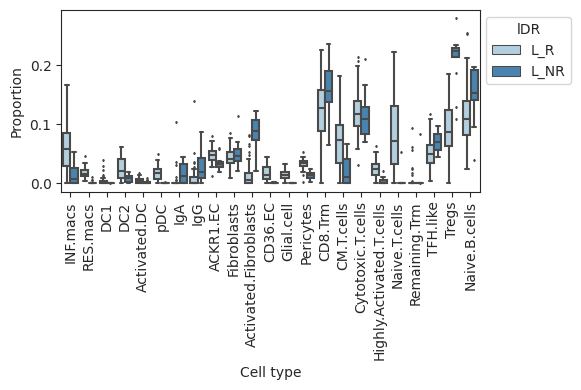

In [10]:
viz.boxplots(data_all, feature_name="lDR")
#plt.savefig("boxplots.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [30]:
model_all = mod.CompositionalAnalysis(data_all, formula="C(lDR, Treatment('L_R'))", reference_cell_type="Fibroblasts")

sim_results = model_all.sample_hmc()



Zero counts encountered in data! Added a pseudocount of 0.5.


100%|█████████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:51<00:00, 42.43it/s]


MCMC sampling finished. (596.286 sec)
Acceptance rate: 44.8%


In [32]:
sim_results.summary()

Compositional Analysis summary:

Data: 59 samples, 23 cell types
Reference index: 9
Formula: C(lDR, Treatment('L_R'))

Intercepts:
                          Final Parameter  Expected Sample
Cell Type                                                 
INF.macs                            0.414       481.469590
RES.macs                           -0.086       292.026068
DC1                                -1.631        62.292627
DC2                                -0.466       199.705358
Activated.DC                       -1.094       106.574372
pDC                                -0.491       194.774615
IgA                                -1.742        55.748086
IgG                                -1.282        88.309092
ACKR1.EC                            0.660       615.751253
Fibroblasts                         0.662       616.983988
Activated.Fibroblasts              -1.011       115.797511
CD36.EC                            -0.170       268.497894
Glial.cell                         -0.253  

In [33]:
print(sim_results.credible_effects())

Covariate                         Cell Type               
C(lDR, Treatment('L_R'))[T.L_NR]  INF.macs                     True
                                  RES.macs                     True
                                  DC1                         False
                                  DC2                         False
                                  Activated.DC                False
                                  pDC                          True
                                  IgA                          True
                                  IgG                          True
                                  ACKR1.EC                    False
                                  Fibroblasts                 False
                                  Activated.Fibroblasts        True
                                  CD36.EC                      True
                                  Glial.cell                   True
                                  Pericytes              

In [34]:
sim_results.summary_extended(hdi_prob=0.9)

Compositional Analysis summary (extended):

Data: 59 samples, 23 cell types
Reference index: 9
Formula: C(lDR, Treatment('L_R'))
Spike-and-slab threshold: 0.657

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 596.286 sec. Acceptance rate: 44.8%

Intercepts:
                          Final Parameter  HDI 5%  HDI 95%     SD  \
Cell Type                                                           
INF.macs                            0.414   0.230    0.597  0.111   
RES.macs                           -0.086  -0.299    0.113  0.130   
DC1                                -1.631  -1.826   -1.384  0.140   
DC2                                -0.466  -0.665   -0.274  0.121   
Activated.DC                       -1.094  -1.297   -0.836  0.148   
pDC                                -0.491  -0.694   -0.264  0.136   
IgA                                -1.742  -1.994   -1.497  0.151   
IgG                                -1.282  -1.516   -1.044  0.145   
ACKR1.EC                        

In [35]:
outPath = "IBD_cibsrt_ldr.out"
sim_results.save(outPath)